In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('mnist_train.csv')

#print(d0)

l=d0['label']

d=d0.drop('label',axis=1)

print(d.head())
print(l.head())
print(d.shape)
print(l.shape)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

In [38]:
data=d.head(15000)

from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(data)
print(standardised_data.shape)

(15000, 784)


In [4]:
sample_data = standardised_data
from sklearn import decomposition
pca = decomposition.PCA()

In [5]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print(pca_data.shape)
pca_data = np.vstack((pca_data.T,l)).T

(42000, 2)


(42000, 3)


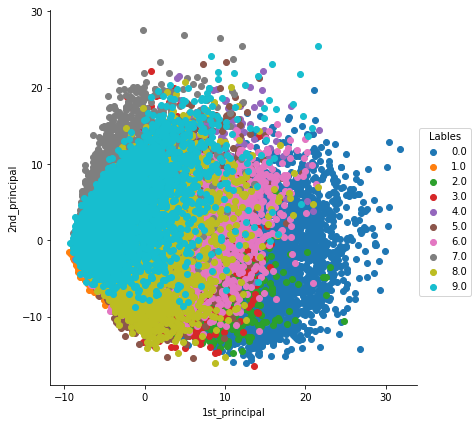

In [6]:
import seaborn as sn
print(pca_data.shape)
pca_dataframe = pd.DataFrame(pca_data,columns = ("1st_principal","2nd_principal","Lables"))

sn.FacetGrid(pca_dataframe , hue = "Lables", size=6).map(plt.scatter ,"1st_principal","2nd_principal").add_legend()

plt.show()

In [7]:
#data = d.head(1000)
#label= l.head(1000)
#data = standardised_data[0:1000,:]
#label = l[0:1000]

In [43]:
label=l.head(15000)
print(data.shape)
print(label.shape)

(15000, 784)
(15000,)


In [39]:
from sklearn.preprocessing import StandardScaler

standardised_data = StandardScaler().fit_transform(data)
print(standardised_data.shape)

(15000, 784)


In [40]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
model = TSNE(n_components = 2, verbose=1, random_state = 0,n_iter=2000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardised_data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15000 samples in 6.321s...
[t-SNE] Computed neighbors for 15000 samples in 646.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for s

In [44]:
print(tsne_data.shape)
tsne_data = np.vstack((tsne_data.T,label)).T
print(tsne_data.shape)

(15000, 2)
(15000, 3)


In [45]:
#tsne_data=tsne_data[:,0:3]
print(tsne_data.shape)
print(tsne_data)

(15000, 3)
[[ 108.97131348  -32.09118271    1.        ]
 [ -66.74523163  -60.13529587    0.        ]
 [  80.76783752   31.04298592    1.        ]
 ..., 
 [  53.15215683  -27.76402664    8.        ]
 [ -16.81315422   70.64715576    9.        ]
 [ -92.77068329  -36.40957642    6.        ]]


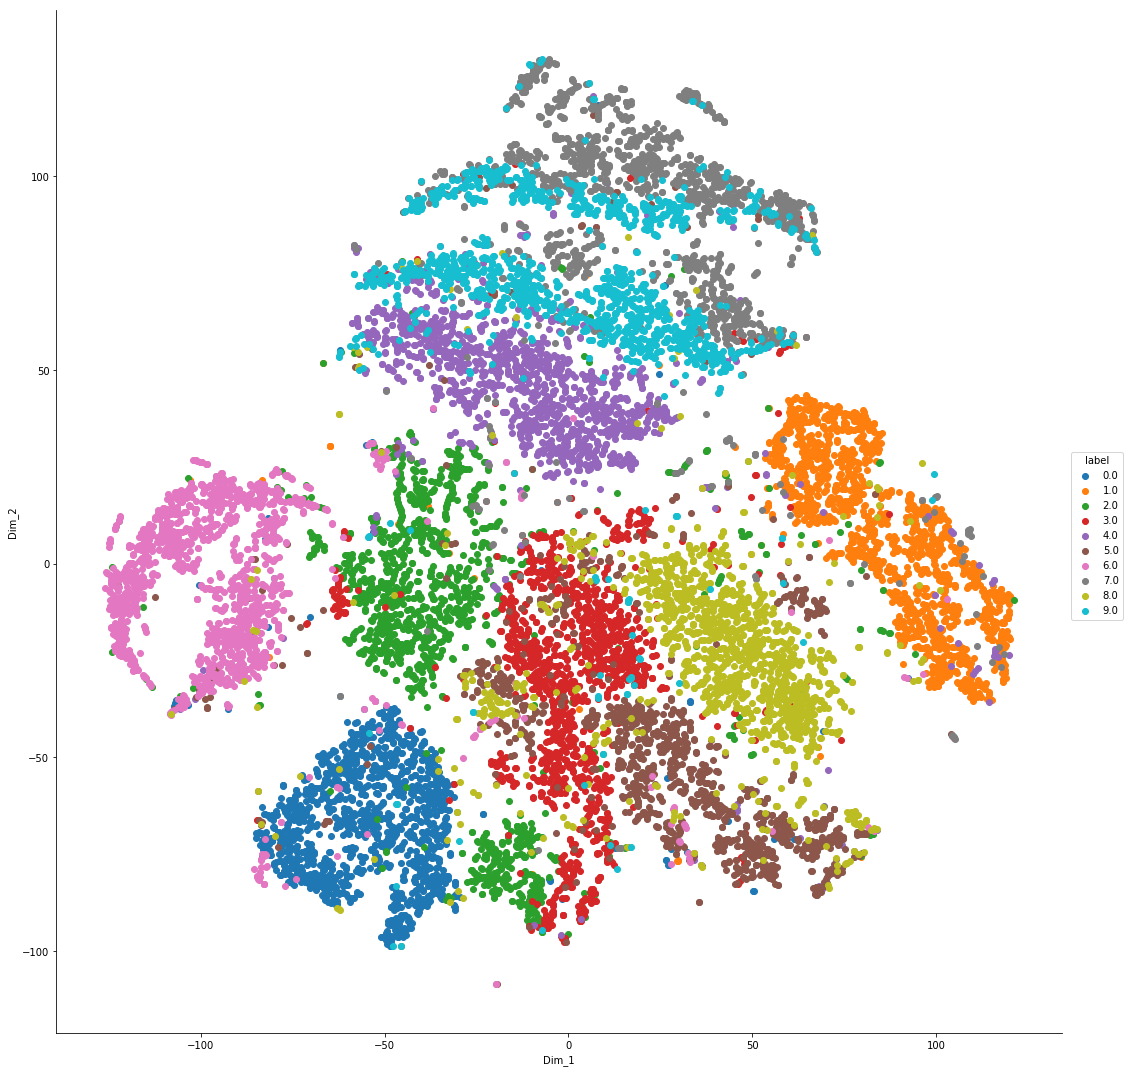

In [48]:
tsne_dataframe = pd.DataFrame(data=tsne_data , columns= ("Dim_1","Dim_2","label"))

sn.FacetGrid( data=tsne_dataframe,hue ="label",size = 15).map(plt.scatter , "Dim_1","Dim_2").add_legend()

plt.show()